<a href="https://colab.research.google.com/github/kkonstantin182/notes/blob/main/sql_and_postgres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stepik.org/course/97207/syllabus

# [0] Introduction

## Data Types

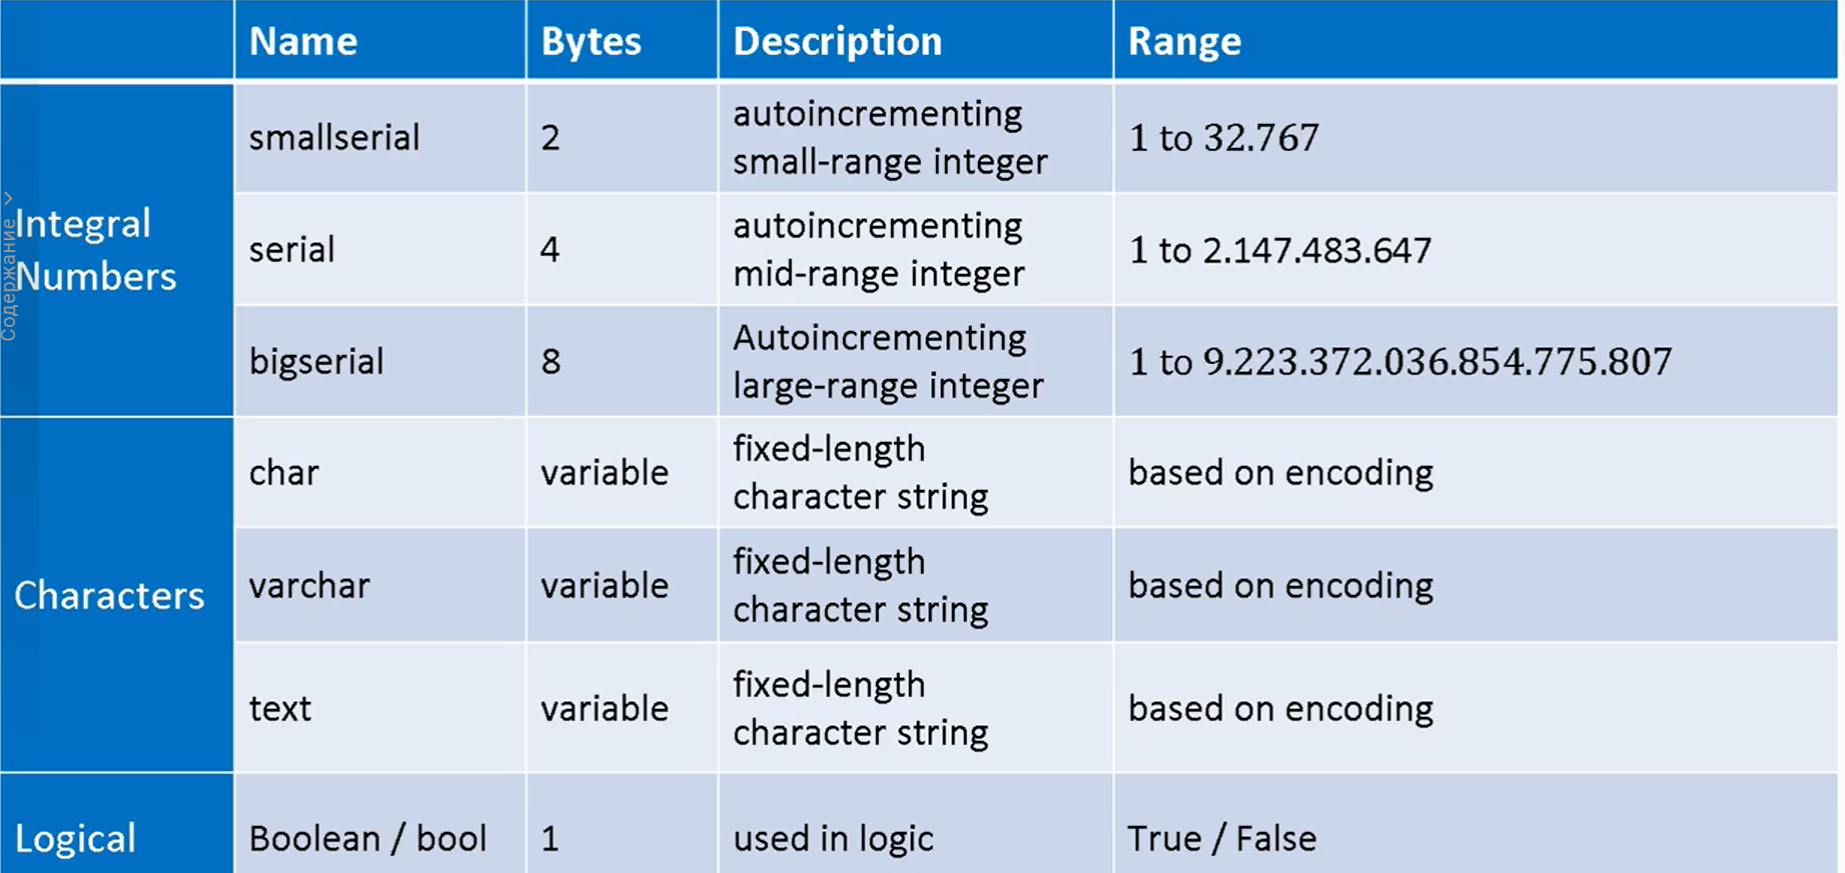

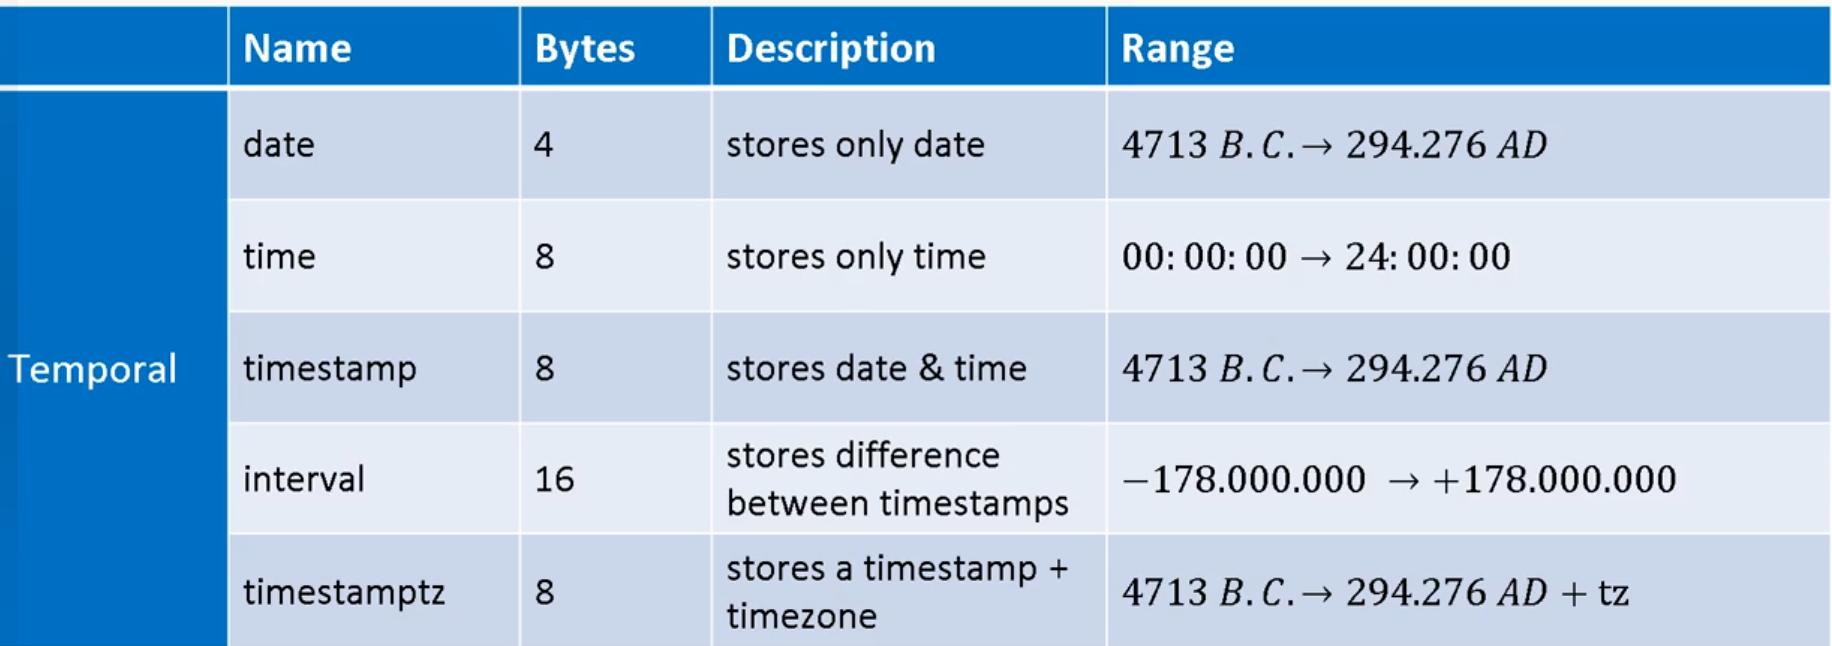

## Creating DB and table

In [ ]:
CREATE DATABASE school ENCODING 'UTF8';

In [ ]:
CREATE TABLE table_name (
    column_name TYPE [column_constraint],
    [table_constraint,]
)

In [ ]:
-- Create a new database
CREATE DATABASE my_database;

-- Connect to the database (run this in psql shell)
\c my_database

-- Create users table with a primary key
CREATE TABLE users (
    user_id SERIAL PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    email VARCHAR(255) UNIQUE NOT NULL
);

-- Create orders table with a foreign key referencing users table
CREATE TABLE orders (
    order_id SERIAL PRIMARY KEY,
    user_id INT REFERENCES users(user_id),
    order_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);

-- Check table structures (run these in psql shell)
\d users
\d orders


## Relationships in SQL - One-to-One, One-to-Many, Many-to-Many, Many-to-One

1. One-to-One Relationship       

    Definition: Each record in Table A is associated with one and only one record in Table B, and vice versa.          
    Setup: Include a foreign key in one of the tables that references the primary key of the other table.

2. One-to-Many Relationship  

    Definition: Each record in Table A can be associated with multiple records in Table B, but each record in Table B is associated with only one record in Table A.       
    Setup: Include a foreign key in the "many" side table (Table B) that references the primary key of the "one" side table (Table A).     
    For example: Tables users and user_profiles, where each user has a single corresponding profile.      
    For example: Tables departments and employees, where each department can have multiple employees, but each employee belongs to one department.

3. Many-to-Many Relationship  

    Definition: Each record in Table A can be associated with multiple records in Table B, and vice versa.     
    Setup: Create an intermediate table (also known as a junctionor linking table) that contains foreign keys referencing both related tables.     
    For example: Tables students and courses, where each student can enroll in multiple courses, and each course can have multiple students.

4. Many-to-One Relationship     

    Definition: Multiple records in table B can be associated with one record in table A.      
    Setup: Crate a Foreign key in "Many Table" that references to Primary Key in "One Table".      
    Example: Table Teachers and Courses, many courses can be taught by single teacher.

# [1] Simple queries

**Order of Writing an SQL Query**    
When writing an SQL query, follow this logical order:        

1. SELECT – Choose the columns to return.
2. FROM – Specify the main table.
3. JOIN – Combine with other tables if needed.
4. WHERE – Filter rows before aggregation.
5. GROUP BY – Group rows based on a column(s).
6. HAVING – Filter groups after aggregation.
7. ORDER BY – Sort the results.
8. LIMIT/OFFSET – Restrict the number of rows.

**Order of SQL Execution (Logical Order)**       
SQL does not execute in the same order it is written. The actual execution order is:        

1. FROM – Determine the source table(s).
2. JOIN – Combine tables if needed.
3. WHERE – Filter rows before aggregation.
4. GROUP BY – Group data.
5. HAVING – Filter aggregated data.
6. SELECT – Choose columns to display.
7. ORDER BY – Sort results.
8. LIMIT/OFFSET – Restrict the number of rows.

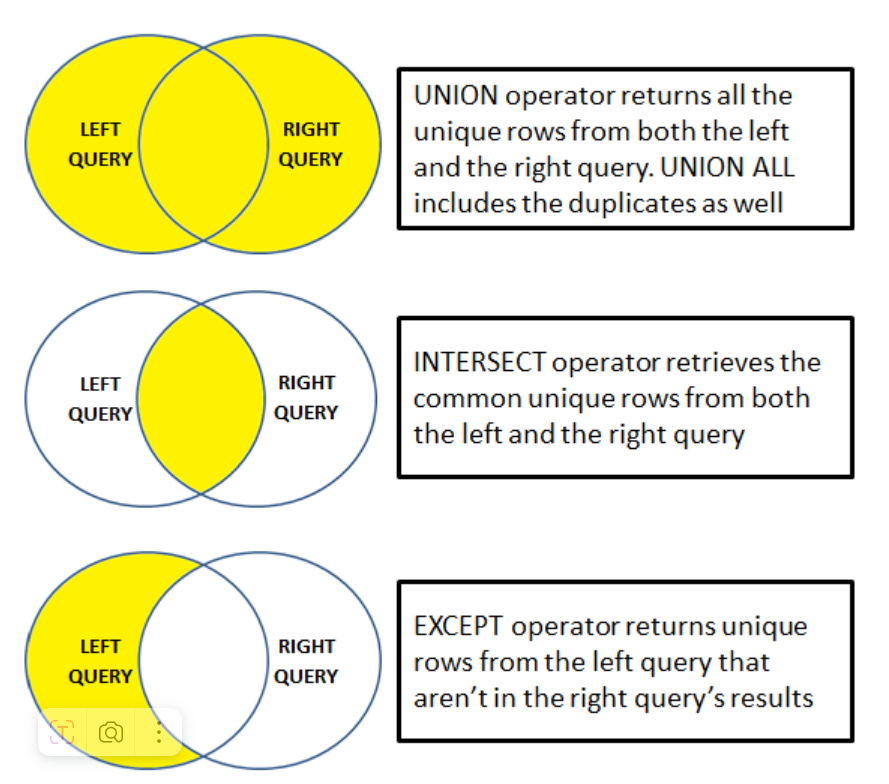

# [2] Joins


Joins in SQL are used to combine rows from two or more tables based on a related column.

**Types of Joins:**
- INNER JOIN – Returns only matching rows from both tables.
- LEFT JOIN (LEFT OUTER JOIN) – Returns all rows from the left table and matching rows from the right. Missing values are NULL.
- RIGHT JOIN (RIGHT OUTER JOIN) – Returns all rows from the right table and matching rows from the left. Missing values are NULL.
- FULL JOIN (FULL OUTER JOIN) – Returns all rows when there is a match in either table. Missing values are NULL.
- CROSS JOIN – Returns the Cartesian product (every row from table A joins with every row from table B).
- SELF JOIN – A table joins with itself.


**Example of USING() in JOIN**        
USING() is used when both tables share the same column name, simplifying the syntax.

In [ ]:
SELECT users.user_id, users.name, orders.order_id, orders.order_date
FROM users
JOIN orders USING(user_id)

In [ ]:
SELECT users.user_id, users.name, orders.order_id, orders.order_date
FROM users
JOIN orders ON users.user_id = orders.user_id;

# [3] Subqueries

## Subqueries

A subquery (or nested query) is a query inside another SQL query. It can be used in different parts of a SQL statement:     

1. In SELECT Clause (Scalar Subquery):

```
SELECT name, (SELECT AVG(salary) FROM employees) AS avg_salary FROM employees;

```

2. In FROM Clause (Derived Table)

```
SELECT dept_name, avg_salary FROM (SELECT dept_id, AVG(salary) AS avg_salary FROM employees GROUP BY dept_id) AS dept_avg;

```

3. In WHERE Clause

```
SELECT name FROM employees WHERE salary > (SELECT AVG(salary) FROM employees);

```

4.  In HAVING Clause

```
SELECT dept_id, AVG(salary) FROM employees GROUP BY dept_id HAVING AVG(salary) > (SELECT AVG(salary) FROM employees);

```

5. In LIMIT Clause


```
--  Retrieves the top 10% highest-paid employees.
SELECT name FROM employees ORDER BY salary DESC LIMIT (SELECT COUNT(*) FROM employees) / 10;
```






## WHERE EXISTS and WHERE NOT EXISTS

EXISTS checks if a subquery returns any rows. It is efficient because it stops checking after finding the first match.

```
SELECT name FROM employees e WHERE EXISTS (SELECT 1 FROM departments d WHERE e.dept_id = d.dept_id);

```


## ANY and ALL Operators

**The ANY operator:**

- returns a boolean value as a result
- returns TRUE if ANY of the subquery values meet the condition
- ANY means that the condition will be true if the operation is true for any of the values in the range.



```
SELECT column_name(s)
FROM table_name
WHERE column_name [operator] ANY
  (SELECT column_name
  FROM table_name
  WHERE condition);
```

**The ALL Operator**

- returns a boolean value as a result
- returns TRUE if ALL of the subquery values meet the condition
- is used with SELECT, WHERE and HAVING statements




```
SELECT column_name(s)
FROM table_name
WHERE column_name [operator] ALL
  (SELECT column_name
  FROM table_name
  WHERE condition);
```


**!!!Note:** The operator must be a standard comparison operator (=, <>, !=, >, >=, <, or <=).





# [4] DDL - Data Definition Language - DB and table manipulation

## Table manipulation

**Order of Execution**     
1️⃣ CREATE TABLE – Defines a new table.    
2️⃣ ALTER TABLE – Modifies an existing table (add/remove columns, constraints, etc.).     
3️⃣ TRUNCATE TABLE – Deletes all records but keeps the table structure.    
4️⃣ DROP TABLE – Completely removes the table from the database.     


!**TRUNCATE** will not return error the columns which have constraints (e.g., foreign key)


- To remove all data with foreign keys:
`TRUNCATE TABLE table_name
CASCADE;`

- To restart identity: `TRUNCATE TABLE products
RESTART IDENTITY;`


- `ALTER TABLE table_name ADD COLUMN column_name data_type;` -- Add column  
- `ALTER TABLE table_name RENAME COLUMN old_column_name TO new_column_name;` -- Rename column  
- `ALTER TABLE table_name RENAME TO new_table_name;` -- Rename table  
- `ALTER TABLE table_name ALTER COLUMN column_name TYPE new_data_type;` -- Change column data type  
- `ALTER TABLE table_name ALTER COLUMN column_name SET DEFAULT default_value;` -- Set default value  
- `ALTER TABLE table_name ALTER COLUMN column_name DROP DEFAULT;` -- Remove default value  
- `ALTER TABLE table_name ALTER COLUMN column_name SET NOT NULL;` -- Add NOT NULL constraint  
- `ALTER TABLE table_name ALTER COLUMN column_name DROP NOT NULL;` -- Remove NOT NULL constraint  
- `ALTER TABLE table_name DROP COLUMN column_name;` -- Remove column  

## Primary Key

Primary key is almost = UNIQUE NOT NULL       
Difference: pk has autoincrement + pk can be only one, unique not null can be applied for many columns

1. 1. Define a Primary Key when Creating a Table

```
CREATE TABLE teachers (     
    teacher_id SERIAL PRIMARY KEY,     
    first_name VARCHAR(50),     
    last_name VARCHAR(50),     
    birthday DATE,     
    phone VARCHAR(20),    
    title VARCHAR(100)     
);
```

2. Add a Primary Key to an Existing Table


```
ALTER TABLE teachers
ADD CONSTRAINT teachers_pkey PRIMARY KEY (teacher_id);

```

3. Delete (Drop) a Primary Key

```
ALTER TABLE teachers
DROP CONSTRAINT teachers_pkey;

```

## Foreign Key

1. Define a Foreign Key When Creating a Table

```
CREATE TABLE teachers (
    teacher_id SERIAL PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50)
);

CREATE TABLE courses (
    course_id SERIAL PRIMARY KEY,
    course_name VARCHAR(100),
    teacher_id INT REFERENCES teachers(teacher_id) -- Foreign Key linking to teachers table
);
```


2. Add a Foreign Key to an Existing Table     

```
ALTER TABLE courses      
ADD CONSTRAINT fk_teacher FOREIGN KEY (teacher_id) REFERENCES teachers
(teacher_id);
```

3. Delete (Drop) a Foreign Key

```
ALTER TABLE courses     
DROP CONSTRAINT fk_teacher;     

```


## Other constraints: CHECK and DEFAULT

```
CREATE TABLE students (
    student_id SERIAL PRIMARY KEY,
    name VARCHAR(100),
    age INT CHECK (age >= 18) -- Ensures age is 18 or above
);
```

```
CREATE TABLE orders (
    order_id SERIAL PRIMARY KEY,
    status VARCHAR(20) DEFAULT 'Pending' -- Default value is 'Pending'
);
```

## Seuquences

A sequence in PostgreSQL is a database object that generates unique numerical values, commonly used for auto-incrementing primary keys.



1. Creating a Sequence

```
CREATE SEQUENCE my_sequence
    INCREMENT BY 1    -- Step size (default is 1)
    START WITH 1      -- First value
    MINVALUE 1        -- Minimum value (default is 1)
    MAXVALUE 1000     -- Maximum value (default is unlimited)
    CYCLE;            -- Restart from MINVALUE when reaching MAXVALUE
```
INCREMENT BY N → Defines step size. Use negative for descending sequences.
MINVALUE and MAXVALUE → Define limits.
CYCLE → Resets to MINVALUE when MAXVALUE is reached.
NO CYCLE (default) → Prevents looping.

2. Using Sequence Values
You can retrieve and manipulate sequence values using built-in functions:

**Get Next Value**

```SELECT NEXTVAL('my_sequence'); -- Generates the next number```

**Get Current Value**

```SELECT CURRVAL('my_sequence'); -- Returns last generated value *within the session*```

⚠️ CURRVAL only works after NEXTVAL has been called in the session.

**Get Last Used Value**

```SELECT LASTVAL(); -- Returns last generated value *globally* in the session```
⚠️ LASTVAL works only if NEXTVAL was called in the session.

## INSERT

Without specifying column names (⚠️ Must insert values for all columns in the correct order)

```
INSERT INTO table_name VALUES (value1, value2, value3);
```

With specified column names (✅ More flexible, allows inserting into selected columns)

```
INSERT INTO table_name (column1, column2) VALUES (value1, value2);
```

We can create new table using data from the another table

```
SELECT *
INTO best_author -- new table
FROM author -- old


```

## UPDATE, DELETE, RETURNING

1. UPDATE: update row in the table

```
UPDATE author -- table
SET full_name = 'abc', rating = 2
WHERE id = 1 -- this is essential to select correct row

```

2. DELETE

```
DELETE FROM author
WHERE rating < 4.5

```

```
DELETE FROM author -- delete all rows
```

```
TRUNCATE TABLE author -- same as delete but doesn't keep logs
```

3. RETURNING

RETURNING allows retrieving values from rows affected by INSERT, UPDATE, or DELETE without needing a separate SELECT query.

```
INSERT INTO employees (first_name, last_name)  
VALUES ('John', 'Doe')  
RETURNING employee_id; -- Returns the auto-generated id after insertion


```

# [5] Database Design

## Database Design Overview


Database design depends on the domain and should be adjusted as needed rather than over-planned. The key focus for developers is logical design.

**Stages of Database Design:**
- Requirements Analysis
- Logical Modeling
- Physical Design & Normalization

---

1. Requirements Analysis
- Identify use cases: Who are the users, and what do they need?
- Collaborate with stakeholders (owners, domain experts).
- Build a conceptual model (entities, attributes, relationships).
2. Logical Design
- Refines the conceptual model in detail.
- Clearly define primary & foreign keys for all tables.
- Specify data types for each column.
- Define logical constraints (challenging to cover everything initially).
- Normalize table relationships (aiming for at least 3rd Normal Form - 3NF).
3. Physical Design
- Choose a Database Management System (DBMS) (may happen earlier).
- Adapt data types to the chosen DBMS.
- Define indexes (not all upfront, some evolve with system usage).
- Create views (optional).
- Set up security & access restrictions.

4. Final Step: ER Diagrams
Entity-Relationship (ER) diagrams help visualize the structure.
This approach keeps database design flexible, structured, and efficient. 🚀









## Bad Practices

🚫 Bad Practices:      
- Lack of normalization → Leads to data redundancy.
- Inconsistent naming conventions → Hard to maintain.
- Mixing unrelated data in the same table.
- No data updates → The domain evolves      

❌ Worst Practices:       
- Storing multiple logical values in one field (e.g., full_name instead of separate first_name and last_name).
- Using computed fields (except when they significantly improve performance).
- Storing arrays or multiple values in one column (unless absolutely necessary).


# [6] Normalization

https://learn.microsoft.com/en-us/office/troubleshoot/access/database-normalization-description

**Normalization** is the process of organizing data in a database. It includes creating tables and establishing relationships between those tables according to rules designed both to protect the data and to make the database more flexible by eliminating redundancy and inconsistent dependency.      

I.e., splitting big tables into small ones.

### First Normal Form (1NF)

1. No duplicate rows.
2. Atomic values – Every column contains only single, indivisible values (e.g., no lists, arrays, or multiple values in a single field).
3. All attributes are of simple data types – Only basic types like INTEGER, VARCHAR, DATE (no arrays or composite types).
4. No repeating groups or separated fields for related data – Data should not be stored in multiple columns when it belongs to a single entity (e.g., Product_1, Product_2, Product_3)




### Second Normal Form (2NF)

1. Satisfies 1NF.
2. Each row must have a a primary key.
3. Records shouldn't depend on anything other than a table's primary key (a compound key, if necessary)

What does '3' mean?     

For example, consider a customer's address in an accounting system. The address is needed by the Customers table, but also by the Orders, Shipping, Invoices, Accounts Receivable, and Collections tables. Instead of storing the customer's address as a separate entry in each of these tables, store it in one place, either in the Customers table or in a separate Addresses table.

### Third Normal Formal (3NF)

1. Satisfies 2NF.
2. All attributes depend only on the PK.

Here publisher contact depend on publisher title

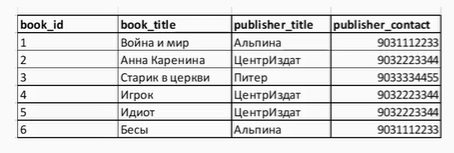

Solution: split into

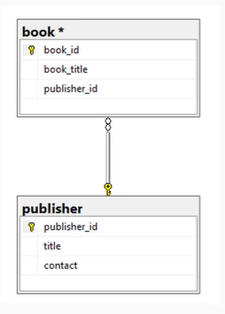

# [7] Views

## Intro

A view is a virtual table in PostgreSQL that is based on a SQL query. It does not store data itself but dynamically presents data from one or more tables.

**Use Cases:**
- Simplify complex queries – Hide complexity by encapsulating queries.
- Enhance security – Restrict access to specific columns/rows.
- Ensure data consistency – Provide a unified interface for multiple tables.
- Improve reusability – Use views in queries instead of repeating logic.


```
CREATE OR REPLACE VIEW my_view AS
SELECT id, name, salary
FROM employees
WHERE salary > 50000;

```

```
DROP VIEW my_view;

```

## Views modification

You can modify a view (insert, update, delete) if it’s simple, meaning:    

- It is based on a single table
- It has only a WHERE condition (no aggregations, joins, or complex operations)

You cannot modify a view if it includes:       

- GROUP BY, HAVING, DISTINCT, WINDOW FUNCTIONS
UNION, INTERSECT, LIMIT, OFFSET
- Joins or subqueries

Types of modifications:     

- Insert/Delete data (only in simple views)
- Rename or change columns using CREATE OR REPLACE VIEW

## CHECK

The CHECK OPTION ensures that any INSERT or UPDATE operations on a view do not violate its WHERE condition. This prevents data that doesn't match the view's filter from being added.  

```
CREATE VIEW view_name AS
SELECT column1, column2 FROM table_name
WHERE condition
WITH CHECK OPTION;


```

# [8] COALESCE, NULLIF

1️⃣ COALESCE
Returns the first non-null value from the given arguments.
Useful for handling NULL values and providing defaults.

```
SELECT COALESCE(NULL, NULL, 'Hello', 'World');
-- Output: 'Hello' (first non-null value)
```

2️⃣ NULLIF
Compares two values; if they are equal, it returns NULL, otherwise, it returns the first value.
Useful to prevent division by zero or ignore unwanted values.

```
SELECT NULLIF(10, 10); -- Output: NULL
SELECT NULLIF(10, 5);  -- Output: 10 (since values are different)

```

3️⃣ Using COALESCE with NULLIF

```
SELECT COALESCE(NULLIF(preferred_name, ''), 'Guest') AS display_name
FROM users;

```

# [9] SQL Functions

There are 2 (main) types of functions in Postgre:
- SQL function
- pgSQL functions

Functions can be:
- Scalar
- Multi-statement table-valued function (TVF)

### Introduction

```
CREATE FUNCTION function_name(arg1 data_type, arg2 data_type, ...)
RETURNS return_type
LANGUAGE SQL -- aslo can be plpgsql
AS $$
BEGIN
    -- function logic
    RETURN some_value;
END;
$$;
```

```
CREATE OR REPLACE FUNCTION function_name(arg1 data_type, ...)
RETURNS return_type
LANGUAGE SQL
AS $$
BEGIN
    -- updated function logic
    RETURN new_value;
END;
$$;
```

To invoke function:
```
SELECT my_function(arg1 data type ...)
```

### Scalar functions

Scalar functions means they return a single value/set of values from the table/column (i.e., not a full table or full column). See below:  

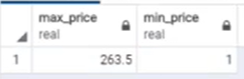


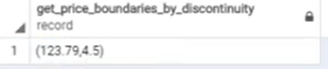

```
CREATE OR REPLACE FUNCTION get_total_number_of_goods() RETURNS bigint LANGUAGE SQL AS $$
SELECT SUM(units_in_stock)
FROM products
$$;

SELECT get_total_number_of_goods() --

```

#### How to return several scalar values?

We can specify:

| Argument  | Purpose              | Modifiable Inside | Optional |
|-----------|----------------------|------------------|----------|
| `IN`      | Input value          | ❌ No            | ❌ No    |
| `OUT`     | Output value         | ✅ Yes           | ✅ Yes   |
| `DEFAULT` | Default input value  | ❌ No            | ✅ Yes   |


*IN argument is optional, usually people don't specify it.

Example

```
CREATE OR REPLACE FUNCTION get_price_boundaries_by_discontinuity_defaut(is_discontinued int DEFAULT 1, OUT max_price real, OUT min_price real) AS $$
    SELECT MAX(unit_price), MIN(unit_price)
    FROM products
    WHERE discontinued = is_discontinued
$$ LANGUAGE SQL;

SELECT *
FROM get_price_boundaries_by_discontinuity_defaut();
```

## Multi-statement table-valued function (TVF)

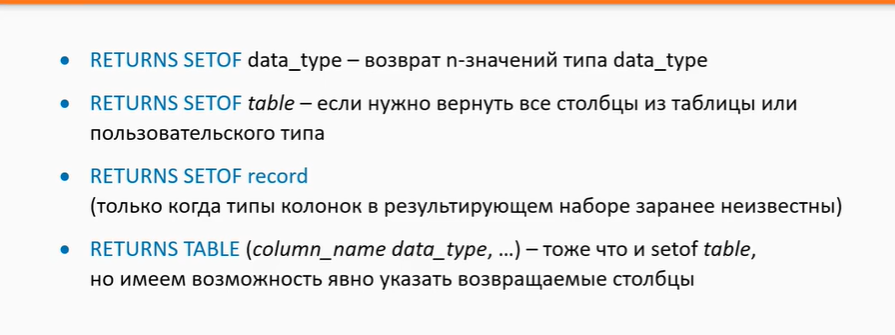

1. **Return a column**


```
CREATE OR REPLACE FUNCTION get_average_prices_by_prod_categories()
        RETURNS SETOF double precision AS $$
    SELECT AVG(unit_price)
    FROM products
    GROUP BY category_id
$$ LANGUAGE SQL;
```

```
SELECT *
FROM get_average_prices_by_prod_categories() AS average_prices; -- Returns a column

```

2. **Return a table (several columns)**

```
CREATE OR REPLACE FUNCTION get_customers_by_country(customer_country varchar)
        RETURNS TABLE(char_code char, company_name varchar) AS $$
    SELECT customer_id, company_name -- customer_id shouldn't be equal to char_code
    FROM customers
    WHERE country = customer_country
$$ LANGUAGE SQL;
```

Select several columns

```
SELECT * FROM get_customers_by_country('USA');

```

Select specific column

```
SELECT company_name FROM get_customers_by_country('USA');

```

3. **Return setof record**

```

CREATE OR REPLACE FUNCTION get_sum_avg_prices_by_prod_categories_depr()
        RETURNS SETOF RECORD AS $$
    SELECT SUM(unit_price), AVG(unit_price)
    FROM products
    GROUP BY category_id
$$ LANGUAGE SQL;
```

In this case we need to specify the columns we wanna return.    
```
SELECT *
FROM get_sum_avg_prices_by_prod_categories_depr() AS (sum_price real, avg_price float8)
```

# [10] PL/pgSQL

## Introduction

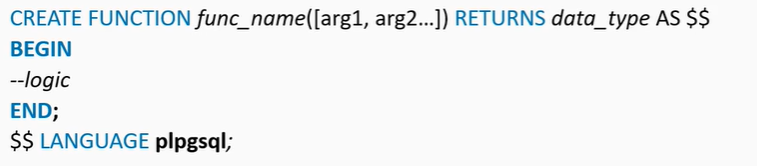

Why do we need pgSQL/difference from ordinary SQL functions:     
- We can create variable;
- We can use procedure logic (like create loops)
- Instead of SELECT in the function body, we use RETURN

## Return and Assignment

- To return single value/set of values, use RETURN or SELECT
- To return table (several columns), use RETURN QUERY

To return single value

```
CREATE OR REPLACE FUNCTION get_price_boundaries1(OUT max_price real, OUT min_price real) AS $$
BEGIN

	-- We can use SELECT
    SELECT MAX(unit_price), MIN(unit_price)
    INTO max_price, min_price
    FROM products;
END
$$ LANGUAGE plpgsql

SELECT * FROM  get_price_boundaries1();
```

```
CREATE OR REPLACE FUNCTION get_price_boundaries2(OUT max_price real, OUT min_price real) AS $$
BEGIN

	-- Or we can use value assingment
    max_price = MAX(unit_price) FROM products;
	min_price = MIN(unit_price) FROM products;
    
END
$$ LANGUAGE plpgsql

SELECT * FROM  get_price_boundaries2();
```


To return table

```
CREATE OR REPLACE FUNCTION get_customers_by_country(customer_country varchar) RETURNS SETOF customers AS $$
BEGIN
    RETURN QUERY
    SELECT *
    FROM customers
    WHERE country = customer_country;
END
$$ LANGUAGE plpgsql;

SELECT * FROM get_customers_by_country('USA')
```


# [12] Indexes

## Introduction

An index is a database structure that improves the speed of data retrieval operations on a table at the cost of additional storage and maintenance.

Index consists of:

- Search Key: A value stored in the index that corresponds to one or more rows in the table.These values are kept sorted to speed up data retrieval.
- Pointer/Data Referencez: A reference to the actual row(s) in the database that contain the search key value.

Example: If the search key is 50,000, the pointer leads to the memory location or disk block where employees with this salary are stored.



Usage of Indexes:
- Speeds up queries (SELECT, WHERE, JOIN, ORDER BY).

- Improves search efficiency, especially for large datasets.

- Optimizes filtering conditions (e.g., WHERE column = value).

Pros of Indexes:       
✅ Faster queries – Speeds up SELECT operations.       
✅ Efficient sorting & filtering – Helps with ORDER BY and GROUP BY.      
✅ Improved joins – Indexes on foreign keys make JOINs faster.       

Cons of Indexes:       
❌ Extra storage – Indexes take up disk space.     
❌ Slower INSERT / UPDATE / DELETE – Changes require index updates.      
❌ Overhead in maintenance – Too many indexes can slow down performance instead of helping.     


## Index Scanning

Index scanning is how a database retrieves data using an index instead of a full table scan. There are different types of index scans, each optimized for different scenarios.

Two main ways are:

1️⃣ Index Only Scan

- Retrieves all needed data directly from the index (without accessing the table).

- Used when all required columns (i.e. data) exist in the index.

- Efficient because it avoids extra disk reads.

2️⃣ Index Scan (Full Index Scan)

- Reads the entire index sequentially.

- Used when a large portion of the table is needed.

## Index Types

**B-Tree Index (Balanced Tree)**

Used for data that can be sorted, i.e. specified operations: >, >=, <, <=, =    
Default index type in PostgreSQL.

Efficient for range queries, sorting, and equality searches.

✅ Pros: Works well for most queries.

❌ Cons: Not ideal for high-cardinality searches (e.g., full-text search).

**Hash Index**

Optimized for equality comparisons (= only).

✅ Pros: Faster than B-Tree for exact matches.

❌ Cons: No range queries (<, >, BETWEEN not supported).

**GIN (Generalized Inverted Index)**

Used for full-text search, JSONB, and array searches.

✅ Pros: Fast multi-value lookups.

❌ Cons: Higher maintenance cost.

**GiST (Generalized Search Tree)**

Used for geospatial data, full-text search, and nearest neighbor queries.

✅ Pros: Supports complex data types.

❌ Cons: Slower updates.

**BRIN (Block Range Index)**

Stores summaries for large datasets (useful for time-series).

✅ Pros: Small storage size, fast range queries.

❌ Cons: Less precise than B-Trees.

**SP-GiST (Space-Partitioned GiST)**

Used for hierarchical or partitioned data (e.g., IP ranges).

✅ Pros: Efficient for non-uniform data distributions.

❌ Cons: More specialized use cases.